In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import speckle_stuffs as spkstf
import pickle
import scipy
import os
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
rootff = ''
root_folder =  rootff+'/30850756806807/' # taken with 20 active and 40 non active, with more datapoints
datas = [
    [root_folder+'data_24102019_001_30850756806807_1190445998213073.pickle', 1.0],
    [root_folder+'data_24102019_002_30850756806807_574935606883125.pickle', 0.5],
    [root_folder+'data_24102019_003_30850756806807_712837508887617.pickle', 0.0],
    [root_folder+'data_24102019_004_30850756806807_1122657623029904.pickle', 0.25],
    [root_folder+'data_24102019_005_30850756806807_1067216341956363.pickle', 0.75],
    [root_folder+'data_24102019_006_30850756806807_180269002544668.pickle', 0.5],
    [root_folder+'data_24102019_007_30850756806807_1387577739451892.pickle', 0.0],
    [root_folder+'data_24102019_008_30850756806807_1297910116143374.pickle', 1.0],
    [root_folder+'data_24102019_009_30850756806807_785462165284252.pickle', 0.25],
    [root_folder+'data_24102019_010_30850756806807_142953870558847.pickle', 0.75],
    [root_folder+'data_25102019_001_30850756806807_1251352631445458.pickle', 0.25],
    [root_folder+'data_25102019_002_30850756806807_117514517722759.pickle', 0.75],
    [root_folder+'data_25102019_003_30850756806807_1090640460058845.pickle', 0.5],
    [root_folder+'data_25102019_004_30850756806807_792281026246145.pickle', 0.0],
    [root_folder+'data_25102019_005_30850756806807_1292646861168297.pickle', 1.0],
    [root_folder+'data_25102019_006_30850756806807_1527796034051682.pickle', 0.25],
    [root_folder+'data_25102019_007_30850756806807_215517781971437.pickle', 0.75],
    [root_folder+'data_25102019_008_30850756806807_1491314098505561.pickle', 0.5],
    [root_folder+'data_25102019_009_30850756806807_1370706989762585.pickle', 0.0],
    [root_folder+'data_25102019_010_30850756806807_305666870174515.pickle', 1.0],
    [root_folder+'data_25102019_011_30850756806807_282395377603257.pickle', 0.25],
    [root_folder+'data_25102019_012_30850756806807_1234872299140370.pickle', 0.75],
    [root_folder+'data_25102019_013_30850756806807_1480897115256717.pickle', 0.5],
    [root_folder+'data_25102019_014_30850756806807_1467564462178801.pickle', 0.0],
    [root_folder+'data_25102019_015_30850756806807_1571802820377880.pickle', 1.0]
]

In [1]:
ccmethod = 'zncc'

datas.sort(key=lambda x:x[1])

df = pd.DataFrame(columns=['dataset','bg_ratio','couplings'])

for picklesource, rr in datas:
    filehandler = open(picklesource, 'rb')
    [extr_traces, extr_footprints, dpars] = pickle.load(filehandler)
    filehandler.close()
    # this dataset include also filtering with wrong parameters, so select the right ones with 1.5
    if dpars['highfilter'] != 1.5 : continue
    gt =  rootff+picklesource.split('/')[-1].split('_')[1] + os.sep+ '_'.join((picklesource.split('/')[-1]).split('_')[:3])+'_gt.mat'                     
    grtrh_traces = spkstf.extract_traces_from_mat(gt)
    try:
        couplings = np.array(spkstf.find_trace_couplings(grtrh_traces, extr_traces, method=ccmethod))
    except:
    # populate the dataframe
    for cc in couplings[:,2]:
        df = df.append({
            'dataset':':'.join(picklesource.split('_')[1:2]),
            'bg_amount':rr*2,
            'couplings':cc
        }, ignore_index=True)

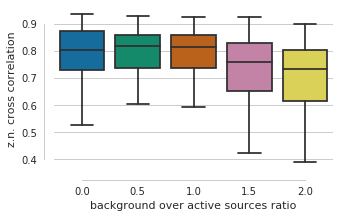

In [7]:
fig = plt.figure(figsize=(5,3))

sns.set(style="whitegrid", palette="colorblind")

sns.boxplot(x="bg_amount", y="couplings", data=df, showfliers=False)
sns.despine(offset=10, trim=True)

plt.xlabel('background over active sources ratio')
plt.ylabel('z.n. cross correlation')

plt.show()